Students will have seen basic visual physiology in Saskia's lecture earlier that day.

"Data" presentation before (along with?) this notebook will cover:
    1) Experimental Setup
    2) outline of preprocessing steps (segmentation, neuropil subtraction, dF/F)
    3) Stimulus protocol (Stim types and Sessions)
    4) "Data cube"
    5) "Experiment container" (Container => Session => Cells)

# Introduction to the Allen Brain Observatory
This notebook documents some classes and functions in the AllenSDK that help manipulate files and data structures in the Allen Brain Observatory.  The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata on request and storing it in well known locations.

## Experiment Containers
The experiment container describes a set of experiments performed with the same targeted area, imaging depth, and Cre line.  The `BrainObservatoryCache` has a number of functions for figuring out what experiment containers are available at the moment.

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint

# Download a list of all targeted areas
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
targeted_structures = boc.get_all_targeted_structures()
print("all targeted structures: " + str(targeted_structures))

all targeted structures: [u'VISal', u'VISl', u'VISp', u'VISpm']


In [2]:
# Download experiment containers for VISp experiments
visp_ecs = boc.get_experiment_containers(targeted_structures=['VISp'])
print("all VISp experiment containers: %d" % len(visp_ecs))

all VISp experiment containers: 25


In [3]:
# Download a list of all imaging depths
depths = boc.get_all_imaging_depths()
print("all imaging depths: " + str(depths))

all imaging depths: [175, 275, 350, 375]


In [4]:
# Download a list of all stimuli
stims = boc.get_all_stimuli()
print("all stimuli:\n")
pprint.pprint(stims)

all stimuli:

['drifting_gratings',
 'locally_sparse_noise',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']


In [5]:
# Download a list of all cre driver lines 
cre_lines = boc.get_all_cre_lines()
print("all cre lines: " + str(cre_lines))

all cre lines: [u'Cux2-CreERT2', u'Rbp4-Cre', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre']


In [6]:
# Download experiment containers for Cux2 experiments
cux2_ecs = boc.get_experiment_containers(cre_lines=['Cux2-CreERT2'])
print("Cux2 experiments: %d\n" % len(cux2_ecs))

print("Example experiment container record:")
pprint.pprint(cux2_ecs[0])

Cux2 experiments: 42

Example experiment container record:
{'age_days': 143.0,
 'cre_line': u'Cux2-CreERT2',
 'id': 511510695,
 'imaging_depth': 175,
 'targeted_structure': u'VISal'}


## Download Experiments for a Container
An experiment container is a group of experiments.  Each experiment has a different stimulus protocol.  For example, one experiment protocol contains the static gratings stimulus and another has the natural scenes stimulus.  The `BrainObservatoryCache` helps you find out which experiment associated with a container has the stimuli you are interested in.  First, let's see what experiments are available for a single container.

In [7]:
# Find all of the experiments for an experiment container
cux2_ec_id = cux2_ecs[0]['id']
exps = boc.get_ophys_experiments(experiment_container_ids=[cux2_ec_id])
print("Experiments for experiment_container_id %d: %d\n" % (cux2_ec_id, len(exps)))
pprint.pprint(exps)

Experiments for experiment_container_id 511510695: 3

[{'age_days': 143.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511510695,
  'id': 503820068,
  'imaging_depth': 175,
  'session_type': u'three_session_B',
  'targeted_structure': u'VISal'},
 {'age_days': 143.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511510695,
  'id': 503412730,
  'imaging_depth': 175,
  'session_type': u'three_session_A',
  'targeted_structure': u'VISal'},
 {'age_days': 143.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511510695,
  'id': 504108263,
  'imaging_depth': 175,
  'session_type': u'three_session_C',
  'targeted_structure': u'VISal'}]


The `session_type` field indicates which experimental protocol was used.  If you just want to find which experiment contains the static gratings stimulus, you can do the following:

In [8]:
import allensdk.brain_observatory.stimulus_info as stim_info

# Find the experiment with the static static gratings stimulus
cux2_ec_id = cux2_ecs[0]['id']
exp = boc.get_ophys_experiments(experiment_container_ids=[cux2_ec_id], 
                                stimuli=[stim_info.STATIC_GRATINGS])[0]
print("Experiment with static gratings:")
pprint.pprint(exp)

Experiment with static gratings:
{'age_days': 143.0,
 'cre_line': u'Cux2-CreERT2',
 'experiment_container_id': 511510695,
 'id': 503820068,
 'imaging_depth': 175,
 'session_type': u'three_session_B',
 'targeted_structure': u'VISal'}


Now we can download the NWB file for this experiment.

In [9]:
exp = boc.get_ophys_experiment_data(exp['id'])

# print out the metadata available in the NWB file
pprint.pprint(exp.get_metadata())

{'age_days': 124,
 'cre_line': 'Cux2-CreERT2',
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.1',
 'excitation_lambda': '910 microns',
 'experiment_container_id': 511510695,
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Cux2-CreERT2; Camk2a-tTA; Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 175,
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': 503820068,
 'session_start_time': datetime.datetime(2016, 2, 24, 11, 27, 49),
 'session_type': 'three_session_B',
 'sex': 'male',
 'targeted_structure': 'VISal'}


# Exercises 1

1)  Find the number of experiments by layer, region, or Cre line.
2)  Find the number of cells by layer, region, or Cre line.

## Find Cells of Interest
Another way to look for data is to search for cells with interesting tuning properties.  We have pre-computed a set of cell metrics, including: 

stimulus          | metric                       | field name 
----------------- | ---------------------------- | ----------
drifting gratings | orientation selectivity      | osi_dg 
                  | direction selectivity        | dsi_dg 
                  | preferred direction          | pref_dir_dg 
                  | preferred temporal frequency | pref_tf_dg 
                  | response p value             | p_dg 
static gratings   | orientation selectivity      | osi_sg 
                  | preferred orientation        | pref_ori_sg 
                  | preferred spatial frequency  | pref_sf_sg 
                  | preferred phase              | pref_phase_sg 
                  | mean time to peak response   | time_to_peak_sg 
                  | response p value             | p_sg 
natural scenes    | mean time to peak response   | time_to_peak_ns 
                  | preferred scene index        | pref_scene_ns 
                  | response p value             | p_ns 

You can use these properties to filter the full set of cells down to the set your are interested in.

In [10]:
import pandas as pd

# Download cells for a set of experiments and convert to DataFrame
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("total cells: %d" % len(cells))
# find direction selective cells in VISp
visp_ec_ids = [ ec['id'] for ec in visp_ecs ]
visp_cells = cells[cells['experiment_container_id'].isin(visp_ec_ids)]
print("VISp cells: %d" % len(visp_cells))

# significant response to drifting gratings stimulus
sig_cells = visp_cells[visp_cells['p_dg'] < 0.05]
print("cells with sig. response to drifting gratings: %d" % len(sig_cells))

# direction selective cells
dsi_cells = sig_cells[(sig_cells['dsi_dg'] > 0.5) & (sig_cells['dsi_dg'] < 1.5)]
print("direction-selective cells: %d" % len(dsi_cells))

total cells: 18260
VISp cells: 7167
cells with sig. response to drifting gratings: 4179
direction-selective cells: 2257


## Find Experiments for Cells
Once you have found a set of cells you would like to investigate, you can use the `BrainObservatoryCache` to find the experiments for those cells that contain the relevant stimulus.

In [11]:
import allensdk.brain_observatory.stimulus_info as stim_info

# find experiment containers for those cells
dsi_ec_ids = dsi_cells['experiment_container_id'].unique()
print("total dsi experiment containers: %d" % len(dsi_ec_ids))

# Download the ophys experiments containing the drifting gratings stimulus for VISp experiment containers
dsi_exps = boc.get_ophys_experiments(experiment_container_ids=dsi_ec_ids, stimuli=[stim_info.DRIFTING_GRATINGS])
print("VISp drifting gratings ophys experiments: %d" % len(dsi_exps))

print("Example ophys experiment:")
pprint.pprint(dsi_exps[0])

total dsi experiment containers: 25
VISp drifting gratings ophys experiments: 25
Example ophys experiment:
{'age_days': 123.0,
 'cre_line': u'Rorb-IRES2-Cre',
 'experiment_container_id': 511507144,
 'id': 501724959,
 'imaging_depth': 275,
 'session_type': u'three_session_A',
 'targeted_structure': u'VISp'}


## Download Experiment Data for a Cell
Once you have some experiments, you can download the NWB files that contain the fluorescence traces for segmented cells in those experiments.

In [12]:
# pick a direction-selective cell and find its NWB file
dsi_cell = dsi_cells.iloc[0]

# figure out which ophys experiment has the drifting gratings stimulus for the cell's experiment container
cell_exp = boc.get_ophys_experiments(experiment_container_ids=[dsi_cell['experiment_container_id']], 
                                     stimuli=[stim_info.DRIFTING_GRATINGS])[0]

data_set = boc.get_ophys_experiment_data(cell_exp['id'])

print("Metadata from NWB file:")
pprint.pprint(data_set.get_metadata())

print("stimuli available in this file:")
print(data_set.list_stimuli())

Metadata from NWB file:
{'age_days': 93,
 'cre_line': 'Scnn1a-Tg3-Cre',
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'excitation_lambda': '910 microns',
 'experiment_container_id': 511498742,
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Scnn1a-Tg3-Cre; Camk2a-tTA; Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 350,
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': 511534603,
 'session_start_time': datetime.datetime(2016, 4, 1, 9, 12, 3),
 'session_type': 'three_session_A',
 'sex': 'male',
 'targeted_structure': 'VISp'}
stimuli available in this file:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']


## Fluorescence Traces
Now that we have a data set, we can plot the traces for the cell we care about.

In [13]:
dsi_cell_id = dsi_cell['cell_specimen_id']
time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[dsi_cell_id])
_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[dsi_cell_id])
_, corrected_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=[dsi_cell_id])
_, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[dsi_cell_id])

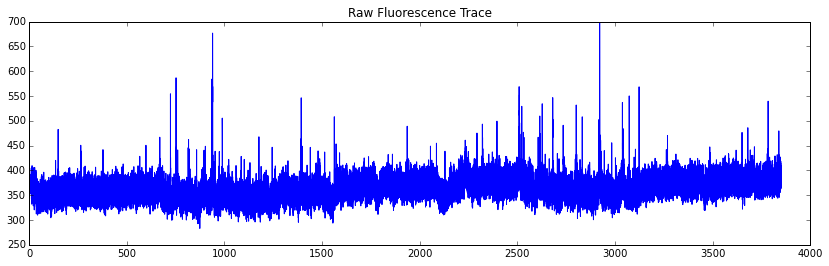

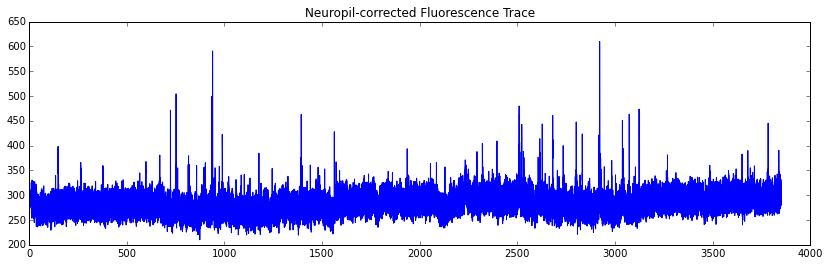

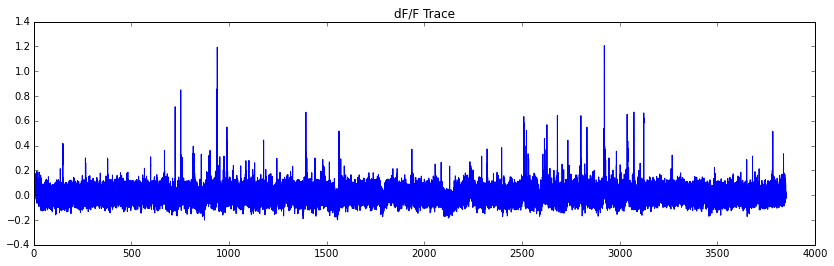

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

# plot raw and corrected ROI trace
plt.figure(figsize=(14,4))
plt.title("Raw Fluorescence Trace")
plt.plot(time, raw_traces[0])
plt.show()

plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, corrected_traces[0])
plt.show()

plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
# warning: dF/F can occasionally be one element longer or shorter 
# than the time stamps for the original traces.
plt.plot(time[:len(dff_traces[0])], dff_traces[0])
plt.show()

## ROI Masks
If you want to take a look at the cell visually, you can open the NWB file and extract a pixel mask.  You can also pull out the maximum intensity projection of the movie for context.

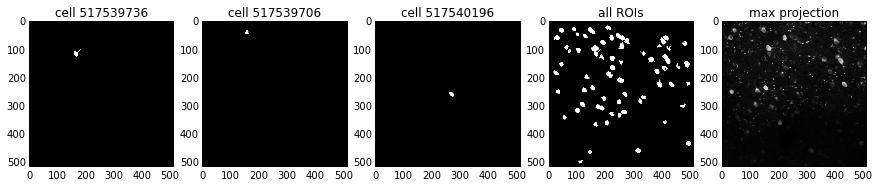

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_set = boc.get_ophys_experiment_data(510221121)

# get the specimen IDs for a few cells
cids = data_set.get_cell_specimen_ids()[:15:5]

# get masks for specific cells
roi_mask_list = data_set.get_roi_mask(cell_specimen_ids=cids)

# plot each mask
f, axes = plt.subplots(1, len(cids)+2, figsize=(15, 3))
for ax, roi_mask, cid in zip(axes[:-2], roi_mask_list, cids):
    ax.imshow(roi_mask.get_mask_plane(), cmap='gray')
    ax.set_title('cell %d' % cid)

# make a mask of all ROIs in the experiment    
all_roi_masks = data_set.get_roi_mask()
sum_mask = np.zeros(data_set.MOVIE_FOV_PX)
for roi_mask in all_roi_masks:
    sum_mask[roi_mask.get_mask_plane()>0] = 1

axes[-2].imshow(sum_mask, cmap='gray')
axes[-2].set_title('all ROIs')

# show the movie max projection
max_projection = data_set.get_max_projection()
axes[-1].imshow(max_projection, cmap='gray')
axes[-1].set_title('max projection')

plt.show()

## ROI Analysis
The code to compute all of the cell metrics available for download (along with several others we haven't put in our database yet) is in the AllenSDK.  All you need is an NWB file.  For example, this is how you compute metrics for the drifting gratings stimulus and plot some results.

In [16]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

# example loading drifing grating data
data_set = boc.get_ophys_experiment_data(512326618)
dg = DriftingGratings(data_set)
print("done analyzing drifting grating")

done analyzing drifting grating


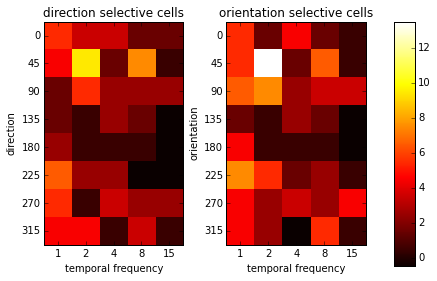

In [17]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# filter for visually responding, selective cells
vis_cells = (dg.peak.ptest_dg < 0.05) &  (dg.peak.peak_dff_dg > 3)
osi_cells = vis_cells & (dg.peak.osi_dg > 0.5) & (dg.peak.osi_dg <= 1.5)
dsi_cells = vis_cells & (dg.peak.dsi_dg > 0.5) & (dg.peak.dsi_dg <= 1.5)

# 2-d tf vs. ori histogram
# tfval = 0 is used for the blank sweep, so we are ignoring it here
os = np.zeros((len(dg.orivals), len(dg.tfvals)-1))
ds = np.zeros((len(dg.orivals), len(dg.tfvals)-1))

for i,trial in dg.peak[osi_cells].iterrows():
    os[trial.ori_dg, trial.tf_dg-1] += 1
    
for i,trial in dg.peak[dsi_cells].iterrows():
    ds[trial.ori_dg, trial.tf_dg-1] += 1

max_count = max(os.max(), ds.max())

fig, (ax1, ax2) = plt.subplots(1,2)

# plot direction selectivity
im = ax1.imshow(ds, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax1.set_xlabel('temporal frequency')
ax1.set_ylabel('direction')
ax1.set_xticks(np.arange(len(dg.tfvals)-1))
ax1.set_xticklabels(dg.tfvals[1:])
ax1.set_yticks(np.arange(len(dg.orivals)))
ax1.set_yticklabels(dg.orivals)
ax1.set_title('direction selective cells')

# plot orientation selectivity
im = ax2.imshow(os, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax2.set_xlabel('temporal frequency')
ax2.set_ylabel('orientation')
ax2.set_xticks(np.arange(len(dg.tfvals)-1))
ax2.set_xticklabels(dg.tfvals[1:])
ax2.set_yticks(np.arange(len(dg.orivals)))
ax2.set_yticklabels(dg.orivals)
ax2.set_title('orientation selective cells')

# plot a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.85])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(0, max_count, 2)+0.5)
cbar.set_ticklabels(np.arange(0, max_count, 2, dtype=int))

plt.show()

## Neuropil Correction
All of the raw fluorescence traces are available in NWB files, but some of these signals are contaminated by nearby neuropil signal.  The code to perform neuropil correction is available in the AllenSDK and can be used as follows:

In [18]:
from allensdk.brain_observatory.r_neuropil import estimate_contamination_ratios

data_set = boc.get_ophys_experiment_data(510221121)
csid = data_set.get_cell_specimen_ids()[0]

time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[csid])
_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[csid])

results = estimate_contamination_ratios(raw_traces[0], neuropil_traces[0])
correction = raw_traces[0] - results['r'] * neuropil_traces[0]
print("r = %f" % results['r'])
print("max error = %f" % results['err'])

r = 0.542121
max error = 0.013060


The NWB files contain the neuropil traces and `r` values needed to perform this correction, so you don't need to recompute them.  The corrected trace can be computed on the fly when you use the `get_corrected_fluorescence_traces` method:

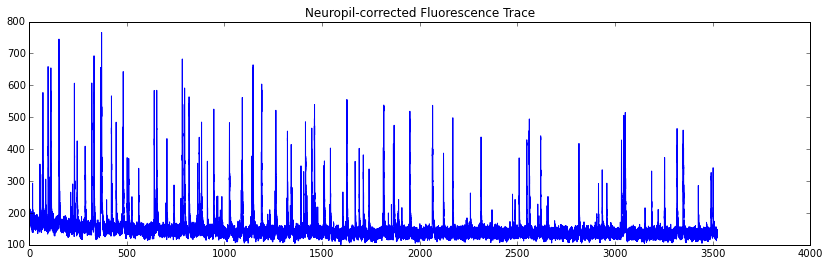

In [19]:
_, corrected_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=[csid])

plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, corrected_traces[0])
plt.show()

## Compute dF/F
You can compute dF/F for yourself using the `allensdk.brain_observatory.dff` module.

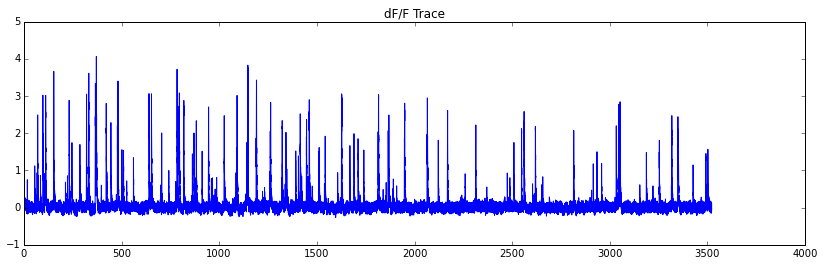

In [20]:
from allensdk.brain_observatory.dff import compute_dff

plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
dff = compute_dff(np.array(corrected_traces))
plt.plot(time, dff[0,:])
plt.show()

<div style='background-color:#fcc;padding:5px;border-radius:3px;border:1px solid #ccc'><b>Warning:</b>
The dF/F traces stored in the NWB file differ slightly from the traces you can compute from the corrected traces as shown above.  The dF/F traces in the NWB file are computed from estimated cellular traces that obey the smoothness constraint of the neuropil subtraction algorithm.  This example shows how to take properly corrected cellular traces (accessible from the <tt>BrainObservatorNwbDataSet.get_corrected_fluorescence_traces</tt> method) and derive the correct dF/F trace.</div>

## Running Speed
We recorded the animal's running speed during the course of the experiment and made it available in the NWB file.

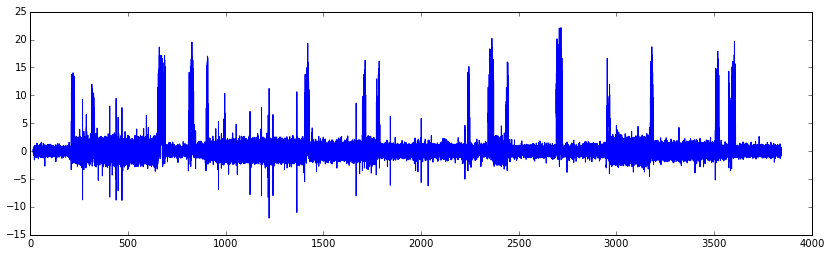

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

data_set = boc.get_ophys_experiment_data(501940850)

dxcm, dxtime = data_set.get_running_speed()
plt.figure(figsize=(14,4))
plt.plot(dxtime, dxcm)
plt.show()

## Motion Correction
X and Y translation values in pixels required to correct for motion artifacts during the experiment are available as well.

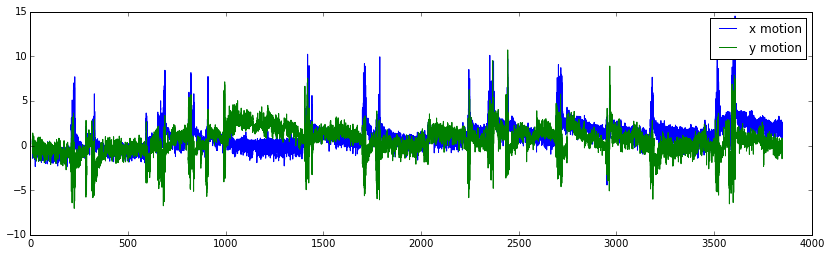

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

data_set = boc.get_ophys_experiment_data(501940850)

mc = data_set.get_motion_correction()

plt.figure(figsize=(14,4))
plt.plot(mc.timestamp, mc.x_motion)
plt.plot(mc.timestamp, mc.y_motion)
plt.legend(['x motion','y motion'])
plt.show()